<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-y/blob/main/2_Data_cleansing_and_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

We read the dataset with the appended lyrics that we exported in Notebook 1

In [2]:
data = pd.read_csv('sample_data/df_raw.csv')

Let's take a look:

In [3]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,57020.715800,57020.715800,34.188600,2.211905e+05,0.583225,0.663517,5.277900,-7.331120,0.646200,0.089677,0.289442,0.025444,0.215624,0.506190,122.642298,3.917300
std,32056.224124,32056.224124,23.594061,9.045619e+04,0.160921,0.225899,3.589563,3.671507,0.478172,0.113400,0.309431,0.079659,0.189913,0.248257,29.691128,0.393797
min,37.000000,37.000000,0.000000,3.039300e+04,0.000000,0.000020,0.000000,-38.384000,0.000000,0.000000,0.000000,0.000000,0.009250,0.000000,0.000000,0.000000
25%,30295.000000,30295.000000,16.000000,1.739470e+05,0.477000,0.508000,2.000000,-9.039250,0.000000,0.035700,0.018400,0.000000,0.098200,0.304000,99.852500,4.000000
50%,56515.000000,56515.000000,36.000000,2.104100e+05,0.592000,0.697000,5.000000,-6.569000,1.000000,0.050000,0.155000,0.000007,0.136000,0.499000,121.603500,4.000000
75%,84784.250000,84784.250000,53.000000,2.518695e+05,0.700000,0.851000,8.000000,-4.824000,1.000000,0.090700,0.535250,0.001472,0.280000,0.707000,141.870750,4.000000
max,113976.000000,113976.000000,98.000000,3.340672e+06,0.980000,1.000000,11.000000,1.104000,1.000000,0.963000,0.995000,0.499000,0.997000,0.993000,216.558000,5.000000


In [4]:
data.head()

,Unnamed: 0.1,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,is_english,lyrics
0,57971,57971,57TrQP3nPUoc92VsooFB7p,When Chai Met Toast,Kahaani,Kahaani,41,215173,False,0.596,...,0.0255,0.90000,0.050300,0.1080,0.430,94.932,4,indie,True,5 ContributorsTranslationsEnglishKahaani Lyric...
1,95765,95765,3VahwVqIK9f0S5H4Rp8Zjp,Mr Black El Presidente,El Clavo,El Clavo,29,262750,False,0.873,...,0.2430,0.24800,0.000000,0.0836,0.653,80.981,3,salsa,True,"1 ContributorEl Clavo LyricsEste es el remix, ..."
2,29375,29375,7kCgycosmwcfZJmbXRseEa,Culture Code;Elle Vee,Make A Promise (feat. Elle Vee),Make A Promise (feat. Elle Vee),36,295909,False,0.437,...,0.0428,0.33200,0.000000,0.1420,0.275,176.025,4,dubstep,True,5 ContributorsMake a Promise Lyrics[Verse 1]\n...
3,34067,34067,40riOy7x9W7GXjyGp4pjAv,Eagles,Hotel California (2013 Remaster),Hotel California - 2013 Remaster,84,391376,False,0.579,...,0.0270,0.00574,0.000494,0.0575,0.609,147.125,4,folk,True,1 ContributorEagles - Hotel California (2013 R...
4,7284,7284,1hoambC4hKUiVx4lM7VSIp,The Infamous Stringdusters,Toward the Fray,Hard Line,25,220706,False,0.544,...,0.0308,0.31500,0.000708,0.3070,0.732,114.705,4,bluegrass,True,1 ContributorHard Line LyricsTell me what you’...


Now we want to see the NA's:

In [5]:
data.isna().sum()

Unnamed: 0.1           0
Unnamed: 0             0
track_id               0
artists                0
album_name             0
track_name             0
popularity             0
duration_ms            0
explicit               0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
track_genre            0
is_english             0
lyrics              2381
dtype: int64

As we can see, our genius.com search resultet in around 3/4 of songs getting their lyrics appended. We want to drop all other songs:

In [6]:
data = data.dropna()


In [7]:
data.describe()


,Unnamed: 0.1,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,7619.000000,7619.000000,7619.000000,7.619000e+03,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000
mean,56219.463447,56219.463447,34.360284,2.164969e+05,0.583686,0.674377,5.300696,-7.056126,0.653104,0.087828,0.259176,0.023093,0.203312,0.506258,122.961702,3.930437
std,32290.187101,32290.187101,25.059022,7.407244e+04,0.159594,0.218855,3.588474,3.343030,0.476014,0.107538,0.295218,0.075322,0.172093,0.244622,29.871055,0.346215
min,37.000000,37.000000,0.000000,3.039300e+04,0.000000,0.000020,0.000000,-32.801000,0.000000,0.000000,0.000001,0.000000,0.009250,0.000000,0.000000,0.000000
25%,29602.500000,29602.500000,10.000000,1.734265e+05,0.477000,0.526000,2.000000,-8.732000,0.000000,0.035500,0.014100,0.000000,0.097200,0.307000,99.939000,4.000000
50%,55591.000000,55591.000000,37.000000,2.085000e+05,0.592000,0.704000,5.000000,-6.355000,1.000000,0.050100,0.123000,0.000007,0.134000,0.498000,121.978000,4.000000
75%,84817.000000,84817.000000,55.000000,2.450200e+05,0.699000,0.855000,8.000000,-4.727500,1.000000,0.089950,0.457000,0.001150,0.261000,0.704000,142.083500,4.000000
max,113976.000000,113976.000000,98.000000,1.556883e+06,0.980000,0.999000,11.000000,1.023000,1.000000,0.963000,0.995000,0.498000,0.997000,0.993000,216.334000,5.000000


Now lets take a look at the columns:

In [8]:
data.nunique()

Unnamed: 0.1        7619
Unnamed: 0          7619
track_id            7251
artists             4495
album_name          5303
track_name          6430
popularity            98
duration_ms         6080
explicit               2
danceability         782
energy               899
key                   12
loudness            4997
mode                   2
speechiness         1125
acousticness        2683
instrumentalness    2488
liveness            1255
valence             1083
tempo               6136
time_signature         5
track_genre          114
is_english             1
lyrics              6316
dtype: int64

We want to get rid of the 2 ghost index columns and also of the track id, and the is_english column:

In [9]:
data_clean = data.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'is_english','track_id'])

lets take a look at the 'key' column

description: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

so we set -1 to NaN

In [10]:
data_clean['key'] = data_clean['key'].replace(to_replace= -1, value= np.nan)


In [11]:
data_clean.isna().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
lyrics              0
dtype: int64

Fortunately, there are no NA's in the key column.

Handling categorical data:

In [12]:
data_clean.dtypes

artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
lyrics               object
dtype: object

In [13]:
data_clean.nunique()

artists             4495
album_name          5303
track_name          6430
popularity            98
duration_ms         6080
explicit               2
danceability         782
energy               899
key                   12
loudness            4997
mode                   2
speechiness         1125
acousticness        2683
instrumentalness    2488
liveness            1255
valence             1083
tempo               6136
time_signature         5
track_genre          114
lyrics              6316
dtype: int64

We handle categorical variables by creating dummy variables on the categorical columns:

In [14]:
catcols = ['explicit', 'mode', 'key', 'track_genre', 'time_signature']
data_cat=pd.get_dummies(data_clean, columns = catcols)
data_cat.dtypes

artists             object
album_name          object
track_name          object
popularity           int64
duration_ms          int64
                     ...  
time_signature_0     uint8
time_signature_1     uint8
time_signature_3     uint8
time_signature_4     uint8
time_signature_5     uint8
Length: 150, dtype: object

Since the artists, album name and track name contain no value for our analysis, we drop those aswell.

In [15]:
# now only keep feature columns and target column
dropcol = ['artists', 'album_name', 'track_name']
df_final = data_cat.drop(columns = dropcol)

In [16]:
df_final.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,41,215173,0.596,0.358,-12.993,0.0255,0.90000,0.050300,0.1080,0.430,...,0,0,0,0,0,0,0,0,1,0
1,29,262750,0.873,0.836,-3.851,0.2430,0.24800,0.000000,0.0836,0.653,...,0,0,0,0,0,0,0,1,0,0
2,36,295909,0.437,0.607,-5.704,0.0428,0.33200,0.000000,0.1420,0.275,...,0,0,0,0,0,0,0,0,1,0
3,84,391376,0.579,0.508,-9.484,0.0270,0.00574,0.000494,0.0575,0.609,...,0,0,0,0,0,0,0,0,1,0
4,25,220706,0.544,0.751,-6.101,0.0308,0.31500,0.000708,0.3070,0.732,...,0,0,0,0,0,0,0,0,1,0


Handling the lyrics column:

In [17]:
pd.set_option('display.max_colwidth', 2000)
df_final.lyrics.head(2)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

First, we want to check if the lyrics column only contains English letters or characters and no other ones (like japanese for example).

For that, we use the check_english_letters function that we already used in the notebook that was running locally for scraping the lyrics.

In [18]:
import re
def check_english_letters(text):
    if isinstance(text, str):
        pattern = re.compile(r'[^\x00-\x7F]') #match any character that is not in the ASCII range of English letters and characters. If a match is found, it means non-English letters or symbols are present in the text.
        match = re.search(pattern, text)
        if match:
            return False  # Non-English letters or symbols found
        else:
            return True  # Contains only English letters and characters
    else:
        return True  # Treat non-string values as English

In [19]:
df_final['is_english'] = df_final['lyrics'].apply(check_english_letters)


Let's see the result:

In [20]:
df_final.is_english.value_counts()


False    4907
True     2712
Name: is_english, dtype: int64

Only around one third of the songs contain english letters only. We will drop all the others:

In [21]:
df_final = df_final[(df_final.is_english == True)].drop(columns = ['is_english'])


In [22]:
df_final.lyrics.head(2)

1    1 ContributorEl Clavo LyricsEste es el remix, el campeon de todo los pesos, el presidente del genero eh\nY ataca de nuevo el mr mr mr black, el asaro\n\nCuando sienta el frio, yo no este\nSentiras el vacio que dejo mi piel\nCuando mis caricias, te hagan falta\nY mi perfume ya no este en tu cama\n\nBorrare en mi memoria si algun dia te bese\nAquellos momentos que estuvimo en la intimidad\nCuando me decias, que tu me querias\nBorrare mi pasado\n\nSi algun dia te arrepientes, no vuelvas no llores por mi\nMe vas a recordar te quize tambien\nPero tus penas fueron las peores\n\nCuando yo este en brazos de otra\nNo me pidas que te perdone\nTu fuiste la que te marchaste\nMataste mis besos con tus herrores\n\nCuando yo este en brazos de otra\nNo me pidas que te perdone\nTu fuiste la que te marchaste\nMataste mis besos con tus herrores\nYou might also likeYo no quiero nada contigo, yo no se lo vas hacer\n\nAlberto sobrino y el jorby, papo iriarte, ricky flow, chawa chawa\nY ataca de nuevo e

As we can see, there are square brackets in the lyrics that contain information like 'verse 1' or 'chorus' or 'Bridge' etc. We want to get rid of those including the brackets.

In [23]:
import re
df_final['lyrics'] = df_final['lyrics'].apply(lambda x: re.sub(r"\[.*?\]", "", x))

we can also see in the head of the lyrics column that all the lyrics start with the number of contributors, the name of the song and the word 'lyrics'.
So we want to take a look if this is just coincidence or if it applies to all rows.

In [24]:
df_final['lyrics'].str.contains('lyrics', case=False).sum()/len(df_final)

1.0

we can see that every row contains the string 'lyrics'.

Therefore, we want to drop everything that comes before the word lyrics, because it has no meaning for the lyrics itself.

For example: '4 ContributorsTall Cans LyricsI’m trying to st...' should drop the '4 ContributorsTall Cans Lyrics'

In [25]:
df_final['lyrics'] = df_final['lyrics'].apply(lambda x: re.sub(r".*?(?i)lyrics", "", x))

<ipython-input-25-97ac0e29e665>:1: DeprecationWarning: Flags not at the start of the expression '.*?(?i)lyrics' but at position 3
  df_final['lyrics'] = df_final['lyrics'].apply(lambda x: re.sub(r".*?(?i)lyrics", "", x))


In [26]:
df_final.lyrics.head(2)

1    Este es el remix, el campeon de todo los pesos, el presidente del genero eh\nY ataca de nuevo el mr mr mr black, el asaro\n\nCuando sienta el frio, yo no este\nSentiras el vacio que dejo mi piel\nCuando mis caricias, te hagan falta\nY mi perfume ya no este en tu cama\n\nBorrare en mi memoria si algun dia te bese\nAquellos momentos que estuvimo en la intimidad\nCuando me decias, que tu me querias\nBorrare mi pasado\n\nSi algun dia te arrepientes, no vuelvas no llores por mi\nMe vas a recordar te quize tambien\nPero tus penas fueron las peores\n\nCuando yo este en brazos de otra\nNo me pidas que te perdone\nTu fuiste la que te marchaste\nMataste mis besos con tus herrores\n\nCuando yo este en brazos de otra\nNo me pidas que te perdone\nTu fuiste la que te marchaste\nMataste mis besos con tus herrores\nYou might also likeYo no quiero nada contigo, yo no se lo vas hacer\n\nAlberto sobrino y el jorby, papo iriarte, ricky flow, chawa chawa\nY ataca de nuevo el mr mr mr black, el asaro\n

We can see that the lyrics contain '\n' to indicate a new line. Therefore we want to delete the '\n' because they indicate a new line and we replace them with an space ' ':

In [27]:
df_final['lyrics'] = df_final['lyrics'].apply(lambda x: re.sub(r'\n', ' ', x))

Now let's take a look at the end of the lyrics.

In [28]:
df_final.lyrics.head(2)

1    Este es el remix, el campeon de todo los pesos, el presidente del genero eh Y ataca de nuevo el mr mr mr black, el asaro  Cuando sienta el frio, yo no este Sentiras el vacio que dejo mi piel Cuando mis caricias, te hagan falta Y mi perfume ya no este en tu cama  Borrare en mi memoria si algun dia te bese Aquellos momentos que estuvimo en la intimidad Cuando me decias, que tu me querias Borrare mi pasado  Si algun dia te arrepientes, no vuelvas no llores por mi Me vas a recordar te quize tambien Pero tus penas fueron las peores  Cuando yo este en brazos de otra No me pidas que te perdone Tu fuiste la que te marchaste Mataste mis besos con tus herrores  Cuando yo este en brazos de otra No me pidas que te perdone Tu fuiste la que te marchaste Mataste mis besos con tus herrores You might also likeYo no quiero nada contigo, yo no se lo vas hacer  Alberto sobrino y el jorby, papo iriarte, ricky flow, chawa chawa Y ataca de nuevo el mr mr mr black, el asaro  Un clavo saca otro clavo Y ya

As we can see, there is the word 'Embed' at the end of each lyric, and sometimes there is even a number in front of it. So wen want to delete those aswell:

In [29]:
df_final['lyrics'] = df_final['lyrics'].apply(lambda x: re.sub(r'\d*Embed$', '', x))

In [30]:
df_final.lyrics.head(2)

1    Este es el remix, el campeon de todo los pesos, el presidente del genero eh Y ataca de nuevo el mr mr mr black, el asaro  Cuando sienta el frio, yo no este Sentiras el vacio que dejo mi piel Cuando mis caricias, te hagan falta Y mi perfume ya no este en tu cama  Borrare en mi memoria si algun dia te bese Aquellos momentos que estuvimo en la intimidad Cuando me decias, que tu me querias Borrare mi pasado  Si algun dia te arrepientes, no vuelvas no llores por mi Me vas a recordar te quize tambien Pero tus penas fueron las peores  Cuando yo este en brazos de otra No me pidas que te perdone Tu fuiste la que te marchaste Mataste mis besos con tus herrores  Cuando yo este en brazos de otra No me pidas que te perdone Tu fuiste la que te marchaste Mataste mis besos con tus herrores You might also likeYo no quiero nada contigo, yo no se lo vas hacer  Alberto sobrino y el jorby, papo iriarte, ricky flow, chawa chawa Y ataca de nuevo el mr mr mr black, el asaro  Un clavo saca otro clavo Y ya

As we can see, the lyrics of the first song is not in English. We said earlier that our analysis will solely focus on english songs, therefore we want to delete every non-english song from the dataset.


For this we use the langdetect package. https://pypi.org/project/langdetect/

In [31]:
!pip install langdetect
from langdetect import detect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=801e1cef5a14aee1ae0994768bc73445d7a8f5e17f9fa546ce0a86256894eb67
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


We use the package to get a new column language and append the detected language

In [32]:
df_final['lang'] = df_final['lyrics'].apply(lambda x: detect(x))

In [33]:
df_final.lang.value_counts()
# we can see that most of the lyrics are in english, so we drop all other rows and also drop the lang column, since we do not need it anymore

en    2570
id      54
es      30
so      16
sw      12
tl       9
ca       5
it       3
et       3
pt       3
nl       2
de       1
cy       1
fr       1
fi       1
sv       1
Name: lang, dtype: int64

We drop the column language and also all rows where the lyrics are not in english.

In [34]:
df_final = df_final[(df_final.lang == 'en')].drop(columns = ['lang'])

In [35]:
df_final

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
2,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000000,0.1420,0.275,...,0,0,0,0,0,0,0,0,1,0
11,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000000,0.1090,0.603,...,0,0,0,0,0,0,0,0,1,0
12,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000000,0.1770,0.500,...,0,0,0,0,0,0,0,0,1,0
20,57,238373,0.480,0.970,-5.006,0.0595,0.000037,0.309000,0.2900,0.346,...,0,0,0,0,0,0,0,0,1,0
25,13,158773,0.478,0.303,-9.352,0.0275,0.497000,0.000000,0.0855,0.830,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,1,284040,0.334,0.814,-14.175,0.0447,0.024700,0.000593,0.5010,0.676,...,0,0,0,0,0,0,0,0,1,0
9987,0,131760,0.620,0.309,-9.209,0.0495,0.788000,0.000000,0.1460,0.664,...,0,0,0,0,0,0,0,0,1,0
9990,3,181728,0.686,0.856,-2.717,0.0426,0.089600,0.000000,0.0648,0.733,...,0,0,0,0,0,0,0,0,1,0
9993,29,229896,0.833,0.720,-13.455,0.2180,0.055400,0.000000,0.3390,0.759,...,0,0,0,0,0,0,0,0,1,0


Now we want to take a closer look at the length of the lyrics. First, we want to take a look at the longest lyrics of the dataset:

In [36]:
data_to_list = df_final['lyrics'].values.tolist()

In [37]:
data_to_list[:2]

[" What if I If I were to confess You're the greatest Human I've ever met And if given the chance I will love you with all All that I am   What if you And me travelled the world What if you were my man What if I was your girl What if I understand What if this could be so different?   Can we make a promise? That whatever happens Like even if the love ends We will always be friends, oh 'Cause if I lost you (you) I'd lose myself too (too) So right before we dive in Can we make a promise, oh? You might also like Oh if we lose this moment We will keep our hearts open I'll never leave you behind You'll never leave me behind Oh if we're ever broken This promise is our potion I'll never leave you behind You'll never leave me behind   Can we make a promise? That whatever happens Like even if the love ends We will always be friends, oh 'Cause if I lost you (you) I'd lose myself too (too) So right before we dive in Can we make a promise, oh?   We'll be forever We'll be forever We'll be forever We

In [38]:
def count_words_longest_element(word_list):
    max_word_count = 0

    for element in word_list:
        words = element.split()
        word_count = len(words)

        if word_count > max_word_count:
            max_word_count = word_count

    return max_word_count

longest_word_count = count_words_longest_element(data_to_list)
print("Number of words in the longest element:", longest_word_count)

Number of words in the longest element: 85152


It seems like the longest lyrics contain almost 85000 words, which is not very realistic for a song. Since the average song is about 3 and a half minutes long, this would result in over 400 words per second.

In September 2014, Eminem received an entry in the Guinness Book of World Records, the song 'Rap God' had held the record for the most words in a song. A total of 1560 words occur in 6:04 minutes, giving an average of 4.28 words per second.

An Idea therefore would be to drop all the rows where the lyrics contain more than 2000 words, because it is unlikely that those are correct. But first, take a look how many there are:

In [39]:
def calculate_percentage(strings, max_word_count):
    count = 0

    for string in strings:
        if len(string.split()) <= max_word_count:
            count += 1

    percentage = (count / len(strings)) * 100
    return percentage



In [40]:
percentage = calculate_percentage(data_to_list,2000)
print(f"Percentage of elements with word count of {2000} or less: {percentage}%")

Percentage of elements with word count of 2000 or less: 97.12062256809338%


Since more than 97% of the dataset has lyrics shorter than 2000 words, we can drop those aswell.

In [41]:
# Calculate word count for each row
df_final['WordCount'] = df_final['lyrics'].apply(lambda x: len(x.split()))

# Filter the DataFrame based on word count condition
df_final = df_final[df_final['WordCount'] <= 2000]

Let's plot the length of the lyrics to take a look:

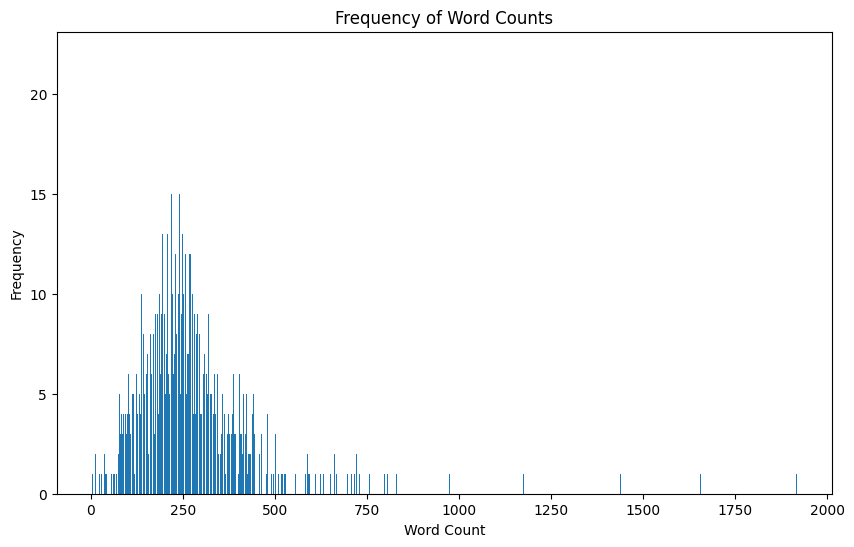

In [42]:
import matplotlib.pyplot as plt

word_counts = df_final['WordCount']
# Calculate the frequency of each word count
word_count_freq = word_counts.value_counts().sort_index()
# Plot the frequency
plt.figure(figsize=(10, 6))
plt.bar(word_count_freq.index, word_count_freq.values)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Frequency of Word Counts')
plt.show()

Looks pretty good so far, so let's drop the wordcount column

In [43]:
df_final = df_final.drop('WordCount', axis=1)

The last step in our data cleaning and preperation will be the removing of any punctuation from the lyrics column and to also convert all the strings to lowercase.
We use the package spacy for this.

In [44]:
!pip install -U spacy

In [45]:
df_final.lyrics = df_final.lyrics.str.lower()

In [46]:
import spacy
def remove_punctuation(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    output = [token for token in doc if not token.is_punct]
    return ' '.join(token.text for token in output)



In [47]:
#Warning! This code takes very long to run.
df_final['lyrics'] = df_final['lyrics'].apply(remove_punctuation)

KeyboardInterrupt: ignored

Since the code takes very long to run, we can try to use "re" instead:

Spacy removes all punctuation except the apostrophe (').
So we have to use the following pattern:
r'[^\w\s\']'

In [48]:
df_final['lyrics'] = df_final['lyrics'].apply(lambda x: re.sub(r'[^\w\s\']', ' ', x))

In [49]:
df_final.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
2,36,295909,0.437,0.607,-5.704,0.0428,0.332000,0.000,0.1420,0.275,...,0,0,0,0,0,0,0,0,1,0
11,49,149973,0.578,0.295,-10.379,0.0294,0.792000,0.000,0.1090,0.603,...,0,0,0,0,0,0,0,0,1,0
12,66,310346,0.423,0.954,-3.157,0.0470,0.002100,0.000,0.1770,0.500,...,0,0,0,0,0,0,0,0,1,0
20,57,238373,0.480,0.970,-5.006,0.0595,0.000037,0.309,0.2900,0.346,...,0,0,0,0,0,0,0,0,1,0
25,13,158773,0.478,0.303,-9.352,0.0275,0.497000,0.000,0.0855,0.830,...,0,0,0,0,0,0,0,0,1,0


Now we are ready for further analysis. So we export our final dataset:

In [50]:
df_final.to_csv('df_final.csv')